# Test out data structures and functions to understand what they do


In [1]:
from aging.organization.longtogeny import LongtogenyPaths
from moseq2_viz.model.util import parse_model_results
from moseq2_viz.util import parse_index
import datetime
import numpy as np
from pathlib import Path
from toolz import groupby, unique, compose, valmap, assoc
from toolz.curried import pluck

In [2]:
paths = LongtogenyPaths()

In [3]:
paths.model_file

PosixPath('/n/groups/datta/rockwell/k2_data_gen4/longtogeny/LONG_AND_ONT/220323_long_ont_model_robust_s1.p')

In [6]:
model_results = parse_model_results(str(paths.model_file), sort_labels_by_usage=True)

In [7]:
index, sorted_index = parse_index(str(paths.index_file))

In [8]:
labels = dict(zip(model_results['keys'], model_results['labels']))

In [9]:
def parse_date(date_str):
    return datetime.datetime.strptime(date_str, 'session_%Y%m%d%H%M%S')

In [10]:
files = []

for uuid, v in sorted_index['files'].items():
    pth = Path(v['path'][0])
    files.append(dict(
        uuid=uuid,
        subject_name=v['metadata']['SubjectName'],
        session_name=v['metadata']['SessionName'],
        session_date=parse_date(pth.parents[1].name),
        session_date_name=pth.parents[1].name,
        start_time=v['metadata'].get('StartTime'),
        group=v['group'],
        rec_full=pth.parents[2].name,
        rec='_'.join(pth.parents[2].name.split('_')[:-1]),
        full_path=pth,
    ))


to get experiment, need data from indices 1, 2, 4

- idx 1: subject_name
- idx 2: session_name
- idx 4: rec_name

In [11]:
grouped_files = groupby('rec', files)

In [12]:
list(grouped_files)

['rec_lon_male', 'rec_lon_fema', 'rec_ont_male']

In [13]:
grouped_files['rec_ont_male'][:2]

[{'uuid': 'fdf7b6b3-2418-4eb1-be09-36de932e1f56',
  'subject_name': 'm16_c04_b04_s01',
  'session_name': 'ontogeny_cohorts_18months_29042021',
  'session_date': datetime.datetime(2021, 4, 29, 12, 22, 4),
  'session_date_name': 'session_20210429122204',
  'start_time': '2021-04-29T12:24:16.9796747-04:00',
  'group': 'default',
  'rec_full': 'rec_ont_male_allsessions',
  'rec': 'rec_ont_male',
  'full_path': PosixPath('/n/groups/datta/rockwell/k2_data_gen3/longtogeny/LONG_AND_ONT/rec_ont_male_allsessions/session_20210429122204/proc/session_20210429122204_reconstructed_results_00.h5')},
 {'uuid': '5e31c1bf-92f6-42a3-bbc7-2a86c44893d4',
  'subject_name': 'm19_c05_b03_s01',
  'session_name': 'ontogeny_cohorts_12months_28042021',
  'session_date': datetime.datetime(2021, 4, 28, 13, 40, 5),
  'session_date_name': 'session_20210428134005',
  'start_time': '2021-04-28T13:41:59.215076-04:00',
  'group': 'default',
  'rec_full': 'rec_ont_male_allsessions',
  'rec': 'rec_ont_male',
  'full_path': 

In [14]:
list(map(lambda d: assoc(d, 'subject_name', '_'.join([d['session_name'][:20], d['subject_name'][:20]])), grouped_files['rec_ont_male'][:2]))

[{'uuid': 'fdf7b6b3-2418-4eb1-be09-36de932e1f56',
  'subject_name': 'ontogeny_cohorts_18m_m16_c04_b04_s01',
  'session_name': 'ontogeny_cohorts_18months_29042021',
  'session_date': datetime.datetime(2021, 4, 29, 12, 22, 4),
  'session_date_name': 'session_20210429122204',
  'start_time': '2021-04-29T12:24:16.9796747-04:00',
  'group': 'default',
  'rec_full': 'rec_ont_male_allsessions',
  'rec': 'rec_ont_male',
  'full_path': PosixPath('/n/groups/datta/rockwell/k2_data_gen3/longtogeny/LONG_AND_ONT/rec_ont_male_allsessions/session_20210429122204/proc/session_20210429122204_reconstructed_results_00.h5')},
 {'uuid': '5e31c1bf-92f6-42a3-bbc7-2a86c44893d4',
  'subject_name': 'ontogeny_cohorts_12m_m19_c05_b03_s01',
  'session_name': 'ontogeny_cohorts_12months_28042021',
  'session_date': datetime.datetime(2021, 4, 28, 13, 40, 5),
  'session_date_name': 'session_20210428134005',
  'start_time': '2021-04-28T13:41:59.215076-04:00',
  'group': 'default',
  'rec_full': 'rec_ont_male_allsessions'

In [15]:
def make_new_subject_name(d: dict):
    '''Make a new subject name from the session name and subject name and assign value to 'subject_name' key in dict.'''
    return assoc(d, 'subject_name', '_'.join([d['session_name'][:20], d['subject_name'][:20]]))

In [16]:
grouped_files['rec_ont_male'] = [make_new_subject_name(d) for d in grouped_files['rec_ont_male']]

In [17]:
[(x['session_name'], x['subject_name']) for x in grouped_files['rec_lon_male'] if 'n' in x['session_name']]

[('nor_03', 'C07_m01'),
 ('nor_03', 'C01_m03'),
 ('nor_03', 'C02_m02'),
 ('nor_03', 'C05_m01'),
 ('nor_03', 'C08_m02'),
 ('nor_03', 'C02_m03'),
 ('nor_03', 'C05_m02'),
 ('nor_03', 'C06_m01'),
 ('nor_03', 'C01_m01'),
 ('nor_03', 'C07_m02'),
 ('nor_03', 'C03_m03'),
 ('nor_03', 'C01_m02'),
 ('nor_03', 'C04_m04'),
 ('nor_03', 'C02_m01'),
 ('nor_03', 'C04_m01'),
 ('nor_03', 'C06_m02'),
 ('nor_03', 'C08_m01'),
 ('nor_03', 'C03_m02'),
 ('nor_03', 'C03_m01'),
 ('aging_o_3', 'c04_m01'),
 ('aging_o_3', 'c01_m03'),
 ('aging_o_3', 'c01_m01'),
 ('aging_o_3', 'c01_m02'),
 ('aging_o_3', 'c03_m03'),
 ('aging_o_3', 'c03_m02'),
 ('aging_o_3', 'c02_m01'),
 ('aging_o_3', 'c03_m01'),
 ('aging_o_3', 'c03_m04'),
 ('aging_o_3', 'c02_m02'),
 ('aging_o_3', 'c04_m02'),
 ('aging_o_3', 'c02_m03'),
 ('aging_o_3', 'c07_m01'),
 ('aging_o_3', 'C07_m02'),
 ('aging_o_3', 'c05_m01'),
 ('aging_o_3', 'C08_m02'),
 ('aging_o_3', 'c08_m01'),
 ('aging_o_3', 'c08_m03'),
 ('aging_o_3', 'C06_m02'),
 ('aging_o_3', 'c06_m03')]

In [18]:
list(grouped_files)

['rec_lon_male', 'rec_lon_fema', 'rec_ont_male']

In [19]:
unique_animals = valmap(compose(list, unique, pluck('subject_name')), grouped_files)

In [20]:
valmap(len, unique_animals)

{'rec_lon_male': 761, 'rec_lon_fema': 481, 'rec_ont_male': 186}

# Assign syllable labels to metadata in index files

In [21]:
import pandas as pd

In [22]:
dtype_map = {
    'uuid': 'category',
    'subject_name': 'category',
    'session_name': 'category',
    'session_date_name': 'category',
    'start_time': 'category',
    'group': 'category',
    'rec_full': 'category',
    'rec': 'category',
    'full_path': 'category',
    'labels': 'int16[pyarrow]',
}

In [31]:
def filter_session(rec, d: dict) -> bool:
    '''Filter out sessions that aren't part of this experiment'''
    if rec == 'rec_lon_male':
        if 'default' in d['subject_name'].lower():
            return False
        if 'm' in d['subject_name'].lower():
            return False
    return True
    

In [27]:
list(grouped_files)

['rec_lon_male', 'rec_lon_fema', 'rec_ont_male']

In [42]:
# TODO: set up intermediate file storage paths
for rec, data in grouped_files.items():
    if rec == 'rec_ont_male':
        experiment_df = []
        for d in data:
            if d['uuid'] in labels and filter_session(rec, d):
                d['labels'] = labels[d['uuid']]
                d['onset'] = np.concatenate(([0], np.diff(d['labels'].astype(int)) != 0)).astype(bool)
                session_df = pd.DataFrame(d).astype(dtype_map)
                experiment_df.append(session_df)
        experiment_df = pd.concat(experiment_df, ignore_index=True).astype(dtype_map)
        break

In [43]:
experiment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9137304 entries, 0 to 9137303
Data columns (total 12 columns):
 #   Column             Dtype         
---  ------             -----         
 0   uuid               category      
 1   subject_name       category      
 2   session_name       category      
 3   session_date       datetime64[ns]
 4   session_date_name  category      
 5   start_time         category      
 6   group              category      
 7   rec_full           category      
 8   rec                category      
 9   full_path          category      
 10  labels             int16[pyarrow]
 11  onset              bool          
dtypes: bool(1), category(9), datetime64[ns](1), int16[pyarrow](1)
memory usage: 217.9 MB


In [44]:
experiment_df['session_name'].unique().to_numpy()

array(['ontogeny_cohorts_18months_29042021',
       'ontogeny_cohorts_12months_28042021',
       '3m_ontogeny_cohorts_19042021', 'ontogeny', 'alia_ontogeny',
       'ontogeny_cohorts_3wks', '3m_ontogey_cohorts_19042021',
       'ontogeny_cohorts_7wks', '6m_ontogeny_cohorts_20402021',
       '6m_ontogeny_cohorts_20042021', 'ontogeny_cohorts_5wks',
       'ontogeny_cohorts_9wks', '3m_ontogeny_cohort_19042021',
       '6m_ontogeny_cohort_20042021', '6m_ontogeny_cohots_20042021',
       '6m_ontogey_cohorts_20042021'], dtype=object)

In [45]:
experiment_df['subject_name'].unique().to_numpy()

array(['ontogeny_cohorts_18m_m16_c04_b04_s01',
       'ontogeny_cohorts_12m_m19_c05_b03_s01',
       'ontogeny_cohorts_12m_m05_c02_b01_s01',
       'ontogeny_cohorts_12m_m03_c01_b03_s01',
       'ontogeny_cohorts_12m_m02_c01_b02_s01',
       'ontogeny_cohorts_18m_m20_c05_b04_s01',
       'ontogeny_cohorts_12m_m12_c03_b04_s01',
       '3m_ontogeny_cohorts__m13_c04_b01_s01',
       'ontogeny_cohorts_18m_m05_c02_b01_s01', 'ontogeny_07_02_04',
       'alia_ontogeny_03_01_02', 'ontogeny_cohorts_3wk_m07b03c02',
       '3m_ontogey_cohorts_1_m3_c03_b03_s01', 'alia_ontogeny_05_03_03',
       'ontogeny_cohorts_7wk_m04_b04_c01',
       'ontogeny_cohorts_12m_m24_c06_b04_s01',
       '6m_ontogeny_cohorts__m13_c04_b01_s01',
       '6m_ontogeny_cohorts__m18_c05_b02_s01',
       'ontogeny_cohorts_5wk_m23b03c03',
       'ontogeny_cohorts_12m_m17_c05_b01_s01',
       '3m_ontogeny_cohorts__m08_c02_b04_s01',
       'ontogeny_cohorts_7wk_m18_b03_c02',
       'ontogeny_cohorts_7wk_m03_b03_c01',
       '3m_o

In [56]:
session_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35948 entries, 0 to 35947
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   uuid               35948 non-null  category      
 1   subject_name       35948 non-null  category      
 2   session_name       35948 non-null  category      
 3   session_date       35948 non-null  datetime64[ns]
 4   session_date_name  35948 non-null  category      
 5   start_time         35948 non-null  category      
 6   group              35948 non-null  category      
 7   rec_full           35948 non-null  category      
 8   rec                35948 non-null  category      
 9   full_path          35948 non-null  category      
 10  labels             35948 non-null  int16[pyarrow]
 11  onset              35948 non-null  bool          
dtypes: bool(1), category(9), datetime64[ns](1), int16[pyarrow](1)
memory usage: 703.3 KB


In [80]:
session_df.head()

,uuid,subject_name,session_name,session_date,session_date_name,start_time,group,rec_full,rec,full_path,labels,onset
0,6dbe0679-9fc6-47fe-911b-d5cec68cfb7d,04_04_030,010,2021-04-08 18:23:33,session_20210408182333,2021-04-08T18:23:34.9759139-04:00,default,rec_lon_male_20210408,rec_lon_male,/n/groups/datta/rockwell/k2_data_gen3/longtoge...,-5,False
1,6dbe0679-9fc6-47fe-911b-d5cec68cfb7d,04_04_030,010,2021-04-08 18:23:33,session_20210408182333,2021-04-08T18:23:34.9759139-04:00,default,rec_lon_male_20210408,rec_lon_male,/n/groups/datta/rockwell/k2_data_gen3/longtoge...,-5,False
2,6dbe0679-9fc6-47fe-911b-d5cec68cfb7d,04_04_030,010,2021-04-08 18:23:33,session_20210408182333,2021-04-08T18:23:34.9759139-04:00,default,rec_lon_male_20210408,rec_lon_male,/n/groups/datta/rockwell/k2_data_gen3/longtoge...,-5,False
3,6dbe0679-9fc6-47fe-911b-d5cec68cfb7d,04_04_030,010,2021-04-08 18:23:33,session_20210408182333,2021-04-08T18:23:34.9759139-04:00,default,rec_lon_male_20210408,rec_lon_male,/n/groups/datta/rockwell/k2_data_gen3/longtoge...,5,True
4,6dbe0679-9fc6-47fe-911b-d5cec68cfb7d,04_04_030,010,2021-04-08 18:23:33,session_20210408182333,2021-04-08T18:23:34.9759139-04:00,default,rec_lon_male_20210408,rec_lon_male,/n/groups/datta/rockwell/k2_data_gen3/longtoge...,5,False


In [81]:
session_df.iloc[0]

uuid                              6dbe0679-9fc6-47fe-911b-d5cec68cfb7d
subject_name                                                 04_04_030
session_name                                                       010
session_date                                       2021-04-08 18:23:33
session_date_name                               session_20210408182333
start_time                           2021-04-08T18:23:34.9759139-04:00
group                                                          default
rec_full                                         rec_lon_male_20210408
rec                                                       rec_lon_male
full_path            /n/groups/datta/rockwell/k2_data_gen3/longtoge...
labels                                                              -5
onset                                                            False
Name: 0, dtype: object

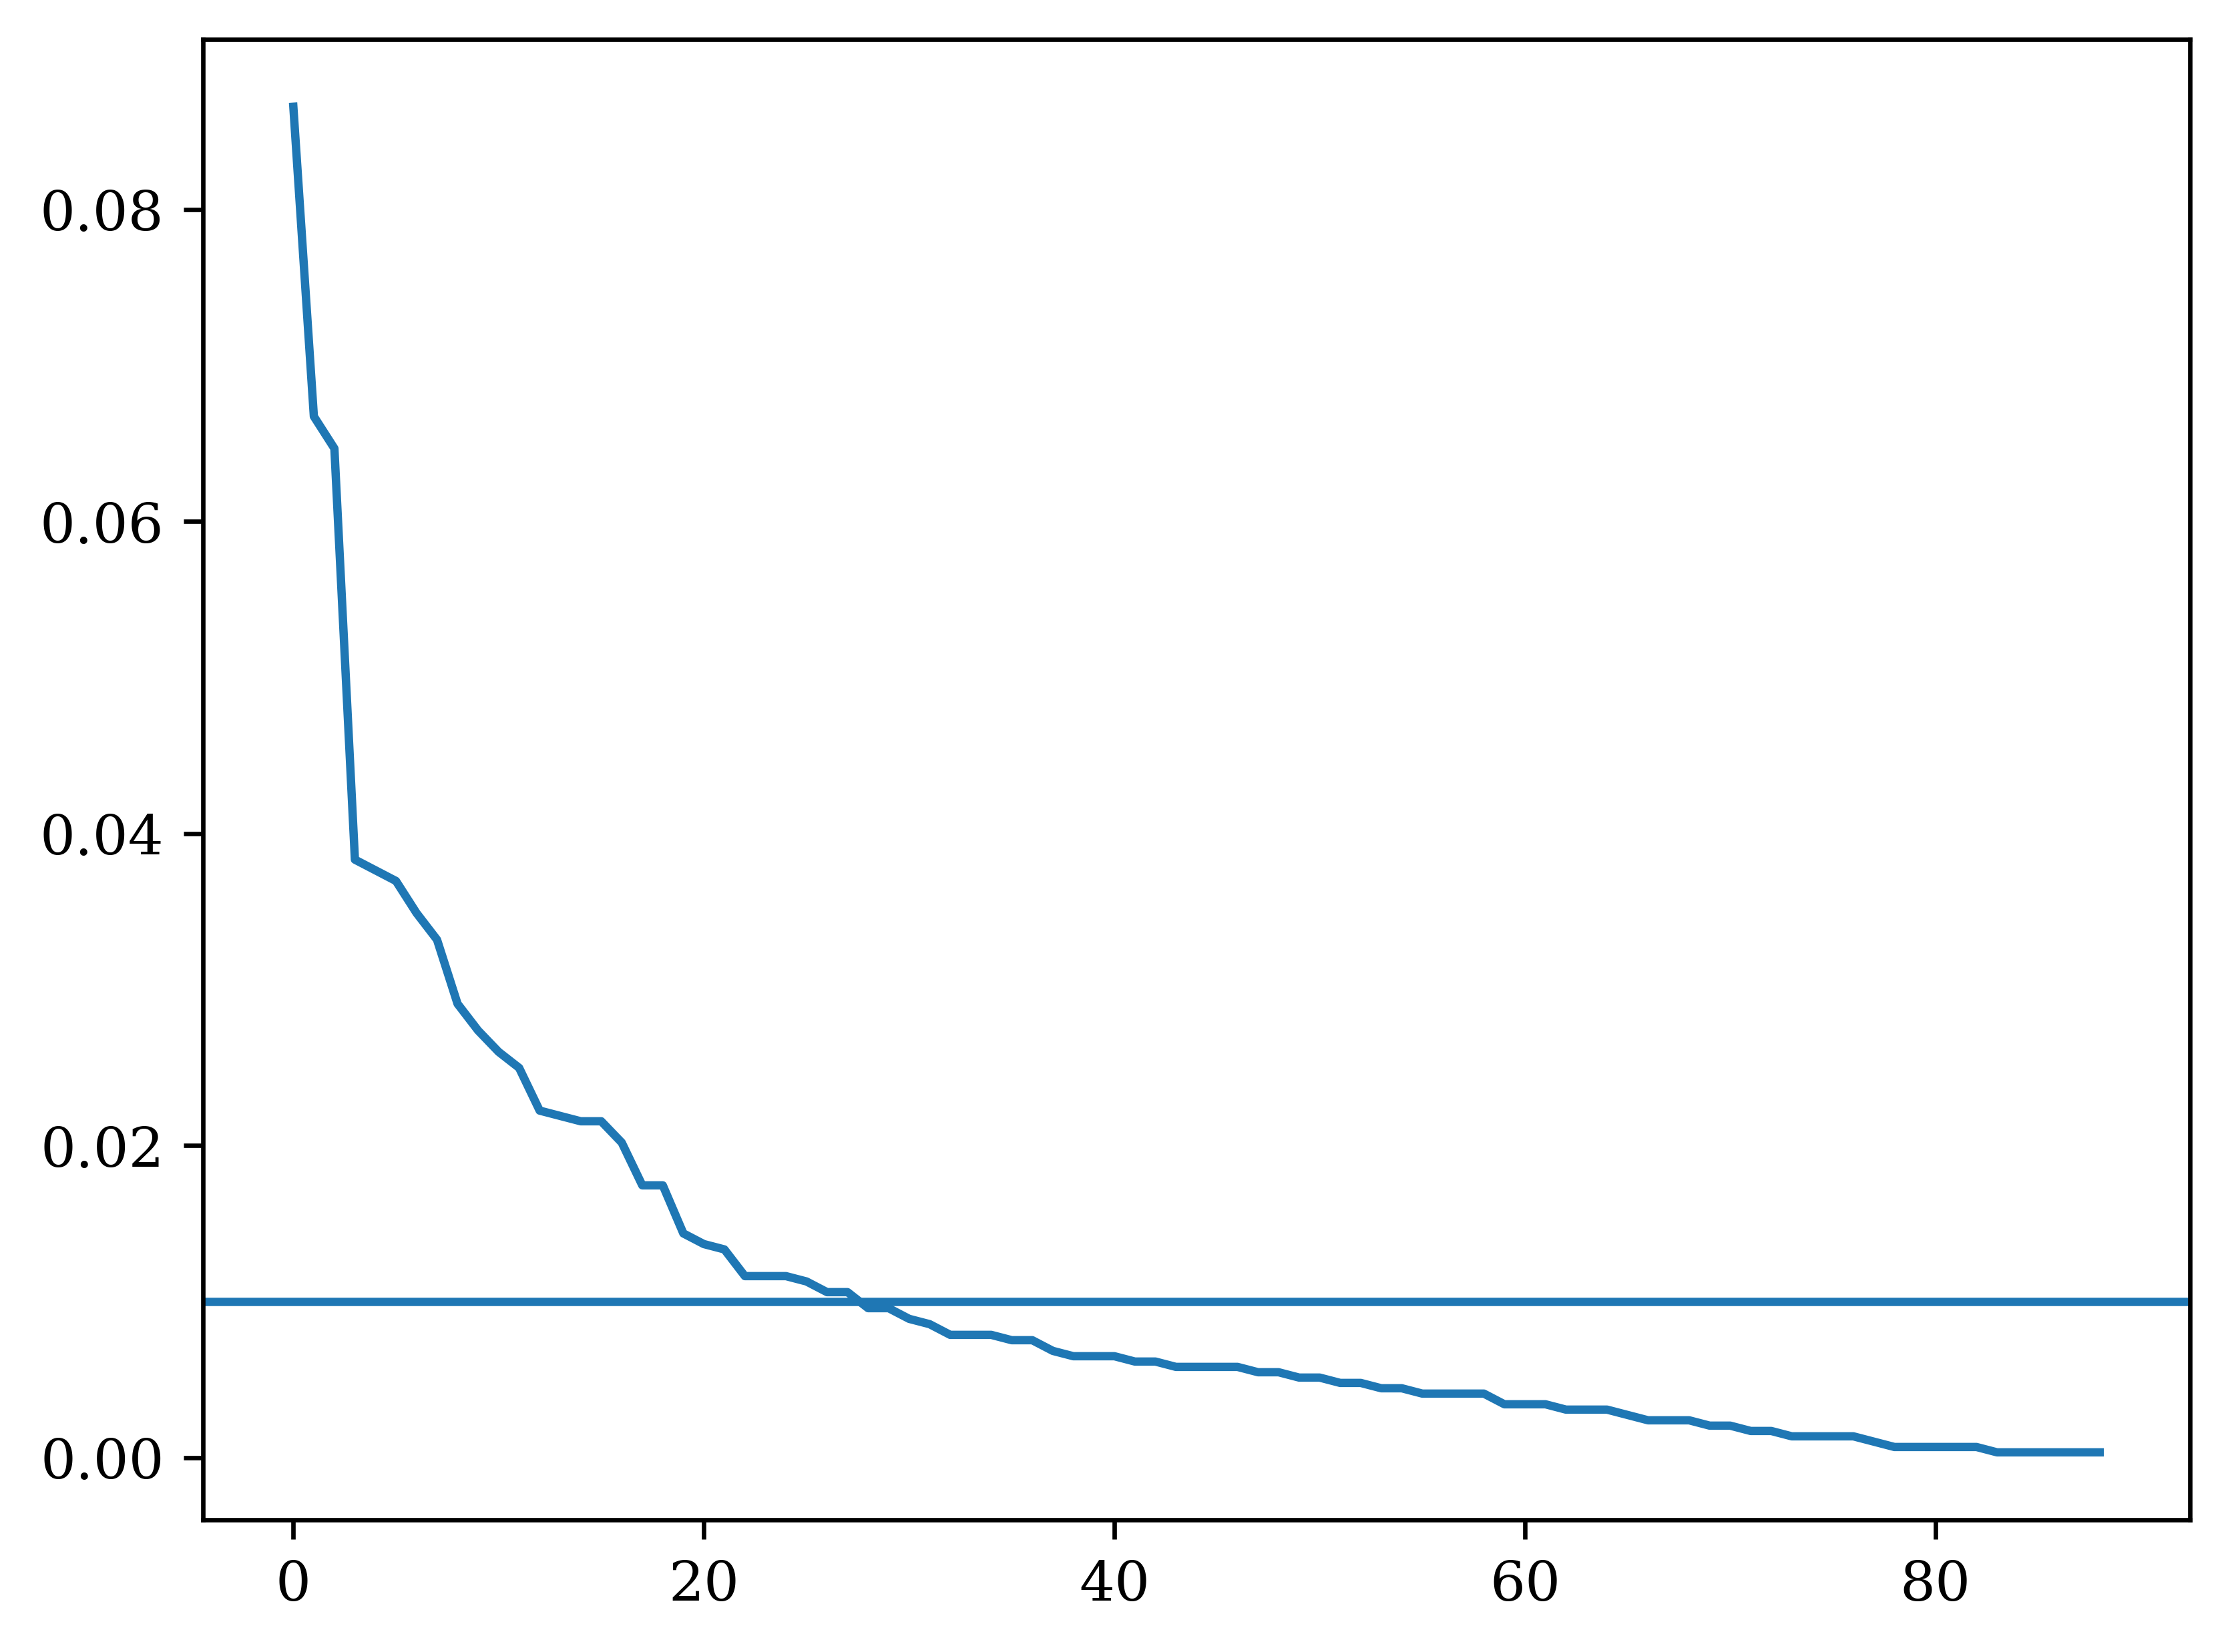

In [50]:
ax = session_df.query('onset')['labels'].value_counts(normalize=True).reset_index(drop=True).plot()
ax.axhline(0.01)

In [3]:
import pandas as pd
from aging.organization.longtogeny import LongtogenyPaths

In [2]:
pth = LongtogenyPaths()

In [4]:
df = pd.read_parquet(pth.intermediate_folder / "rec_lon_fema.parquet")

<Axes: >

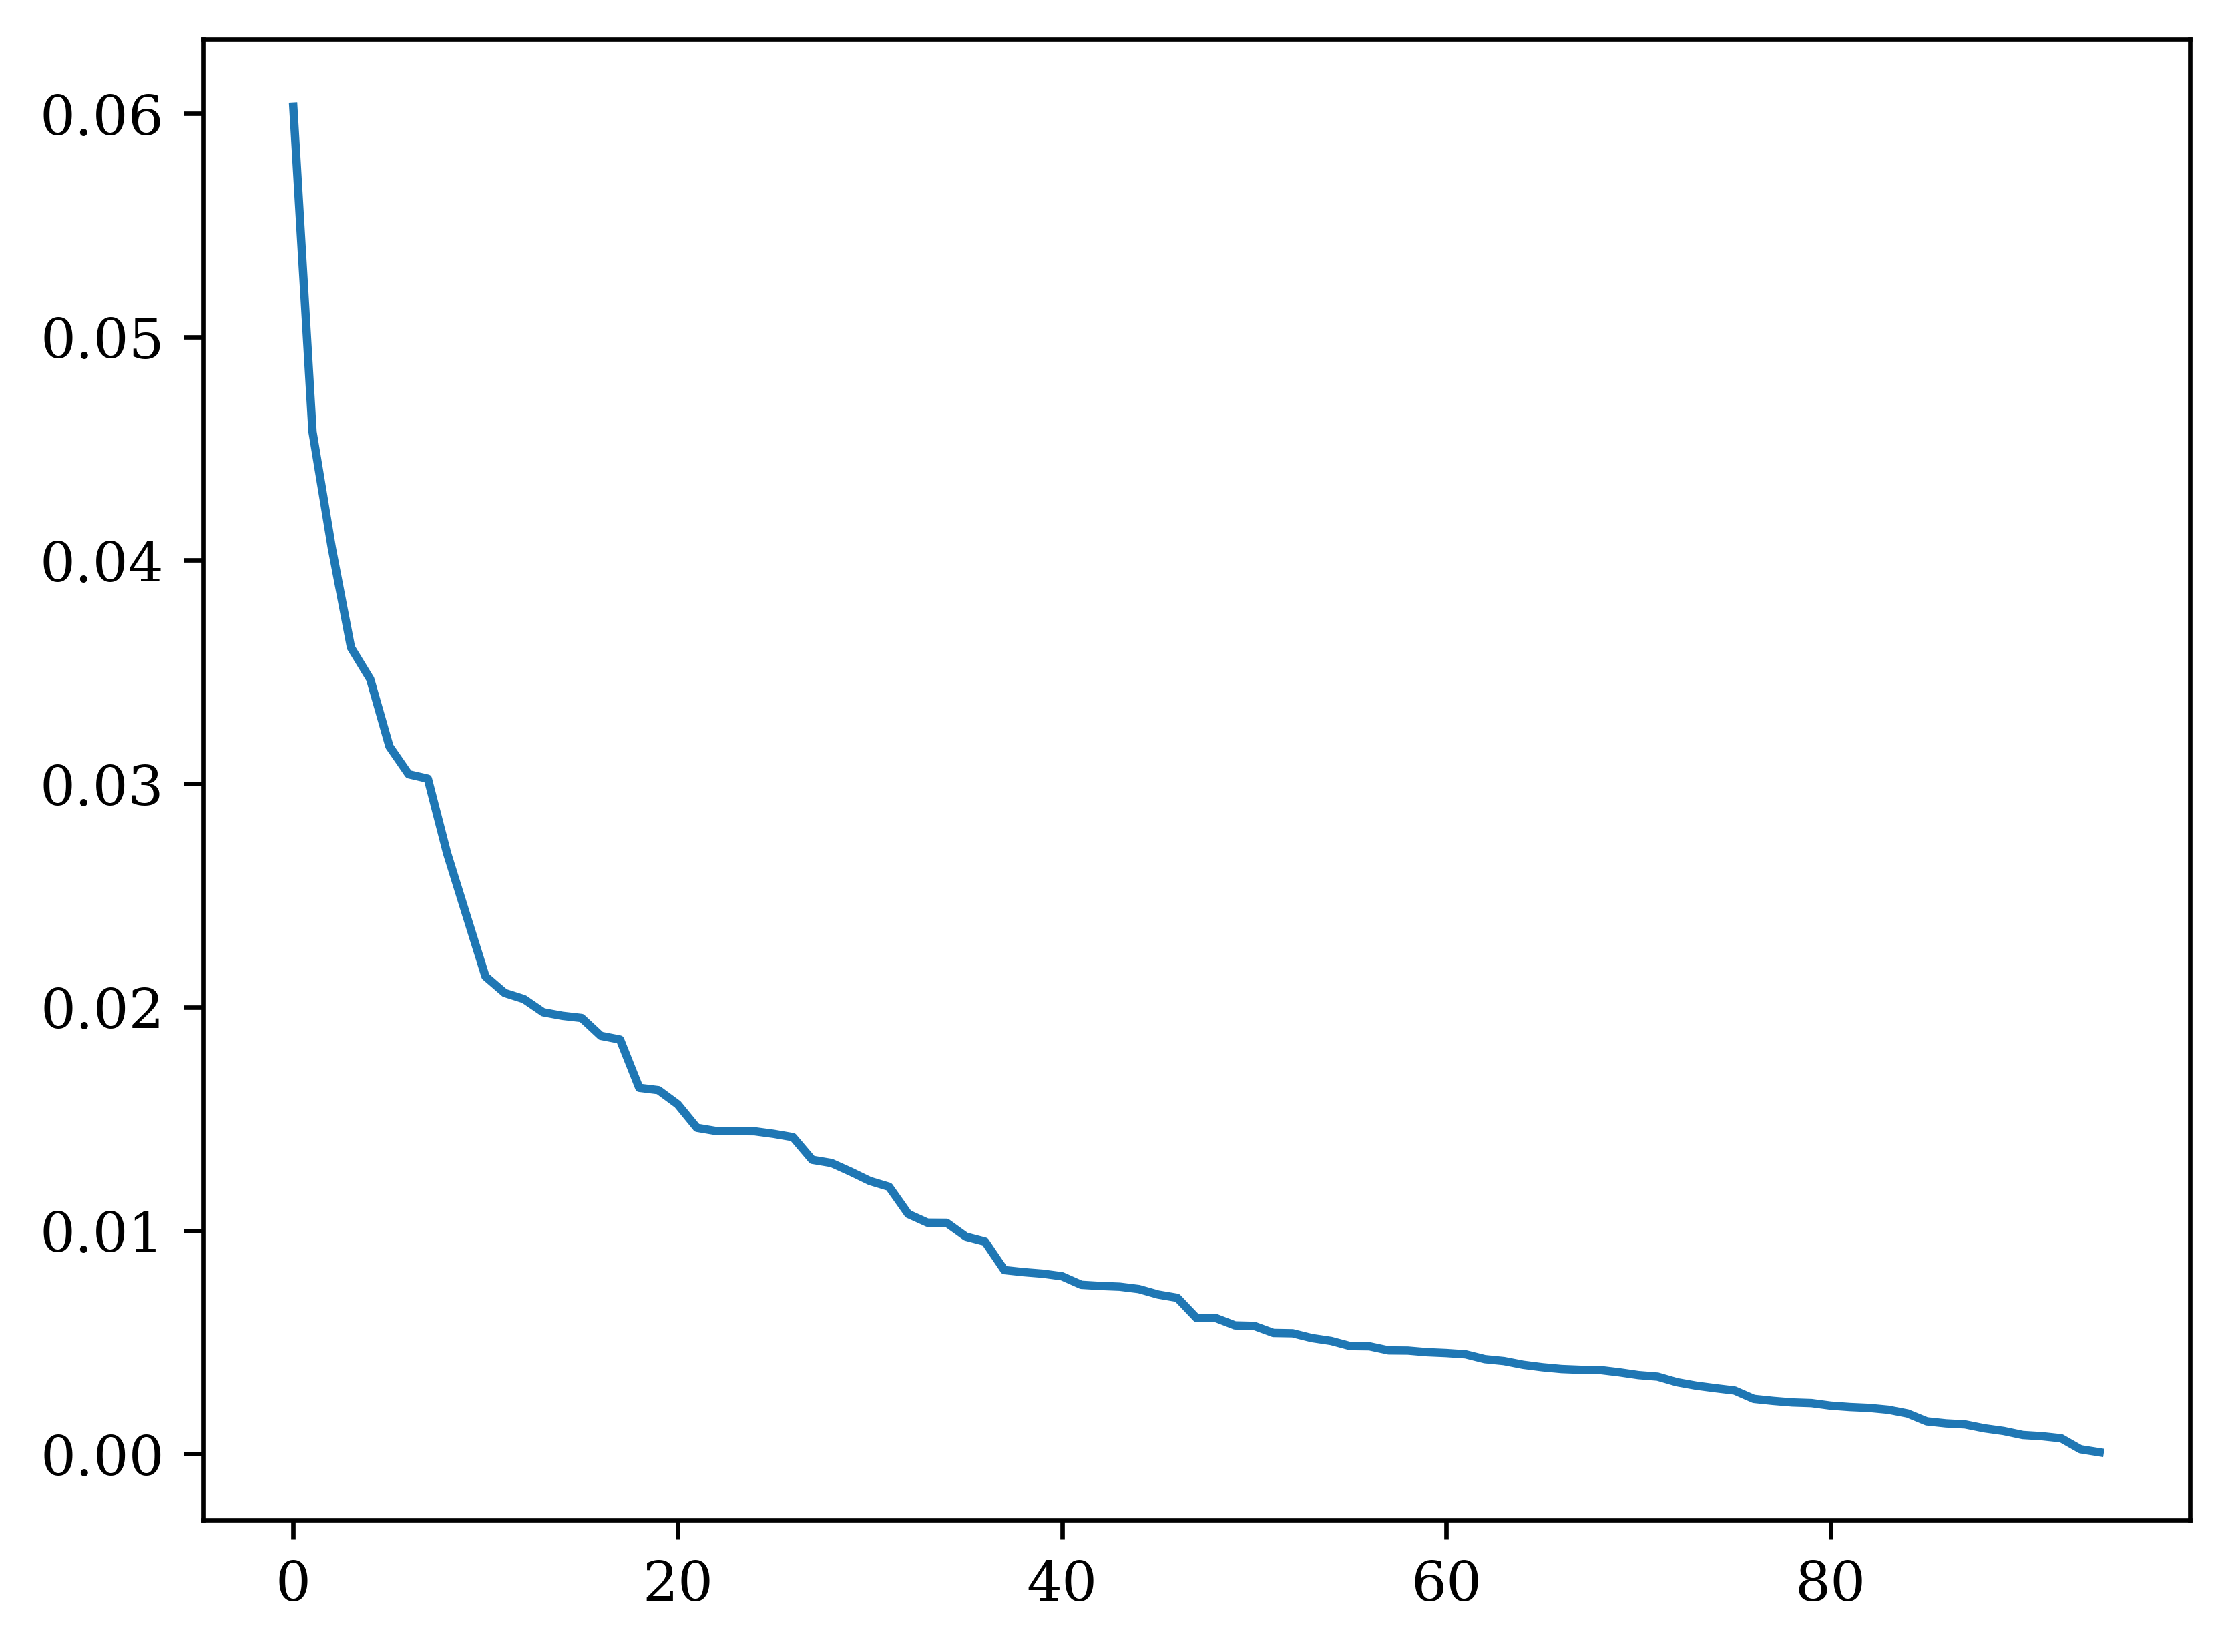

In [7]:
df.query('onset')['labels'].value_counts(normalize=True).reset_index(drop=True).plot()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18778674 entries, 0 to 18778673
Data columns (total 14 columns):
 #   Column             Dtype         
---  ------             -----         
 0   uuid               category      
 1   subject_name       category      
 2   session_name       category      
 3   session_date       datetime64[ns]
 4   session_date_name  category      
 5   start_time         category      
 6   group              category      
 7   rec_full           category      
 8   rec                category      
 9   full_path          category      
 10  labels             int16[pyarrow]
 11  onset              bool          
 12  mouse_id           int8          
 13  cage_id            int8          
dtypes: bool(1), category(9), datetime64[ns](1), int16[pyarrow](1), int8(2)
memory usage: 483.6 MB


In [11]:
earliest_date = df['session_date'].min()

In [13]:
earliest_mouse_age = 24  # in days

(df['session_date'] - earliest_date).dt.days.head()

0    234
1    234
2    234
3    234
4    234
Name: session_date, dtype: int32

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18778674 entries, 0 to 18778673
Data columns (total 14 columns):
 #   Column             Dtype         
---  ------             -----         
 0   uuid               category      
 1   subject_name       category      
 2   session_name       category      
 3   session_date       datetime64[ns]
 4   session_date_name  category      
 5   start_time         category      
 6   group              category      
 7   rec_full           category      
 8   rec                category      
 9   full_path          category      
 10  labels             int16[pyarrow]
 11  onset              bool          
 12  mouse_id           int8          
 13  cage_id            int8          
dtypes: bool(1), category(9), datetime64[ns](1), int16[pyarrow](1), int8(2)
memory usage: 483.6 MB


In [20]:
usage = pd.pivot_table(df.groupby('uuid', sort=False, observed=True)['labels'].value_counts().reset_index(), index='uuid', columns='labels', fill_value=0)['count']

In [21]:
usage

labels,-5,0,1,2,3,4,5,6,7,8,...,85,86,87,88,89,90,91,92,93,94
uuid,,,,,,,,,,,,,,,,,,,,,
0070fc93-10e1-4577-9029-6b858de99ed9,3,1336,846,869,1260,1220,836,997,61,1004,...,83,0,199,82,0,41,105,13,0,0
00eb5418-38d8-4245-b01b-83719196df8d,3,3672,1184,1013,1423,604,678,2231,21,1065,...,0,0,0,27,0,0,0,0,0,0
0137a439-0ee6-4d9a-9a11-9fc845d2ee3c,3,410,906,403,453,1582,364,23,1416,602,...,196,21,62,202,0,97,98,84,0,0
018efa70-33b6-4de1-b621-2e0c5e86bb7e,3,988,928,628,1314,1444,1434,519,116,1612,...,82,123,48,8,0,298,15,45,0,11
024a4d3a-33da-4cfc-a3b3-7d11e4bcabbe,3,1257,725,517,728,1117,1189,447,301,1139,...,75,0,220,141,0,11,28,19,219,103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fd8d5f10-fb6a-43ba-9b40-87057912aeec,3,1621,797,558,1769,1632,1011,993,49,670,...,11,3,22,37,5,69,10,0,0,0
fde029ea-b352-4f2f-ba5f-898b9d1546fa,3,3115,1285,922,1636,601,676,1021,32,948,...,0,50,81,62,3,0,47,0,0,10
fe06ab8d-3c84-4c2f-bd1c-da6ee22c5e77,3,730,1339,432,1150,2523,374,176,1319,321,...,0,0,128,187,0,0,0,154,0,0


In [17]:
import seaborn as sns

In [24]:
import numpy as np

<Axes: xlabel='labels', ylabel='uuid'>

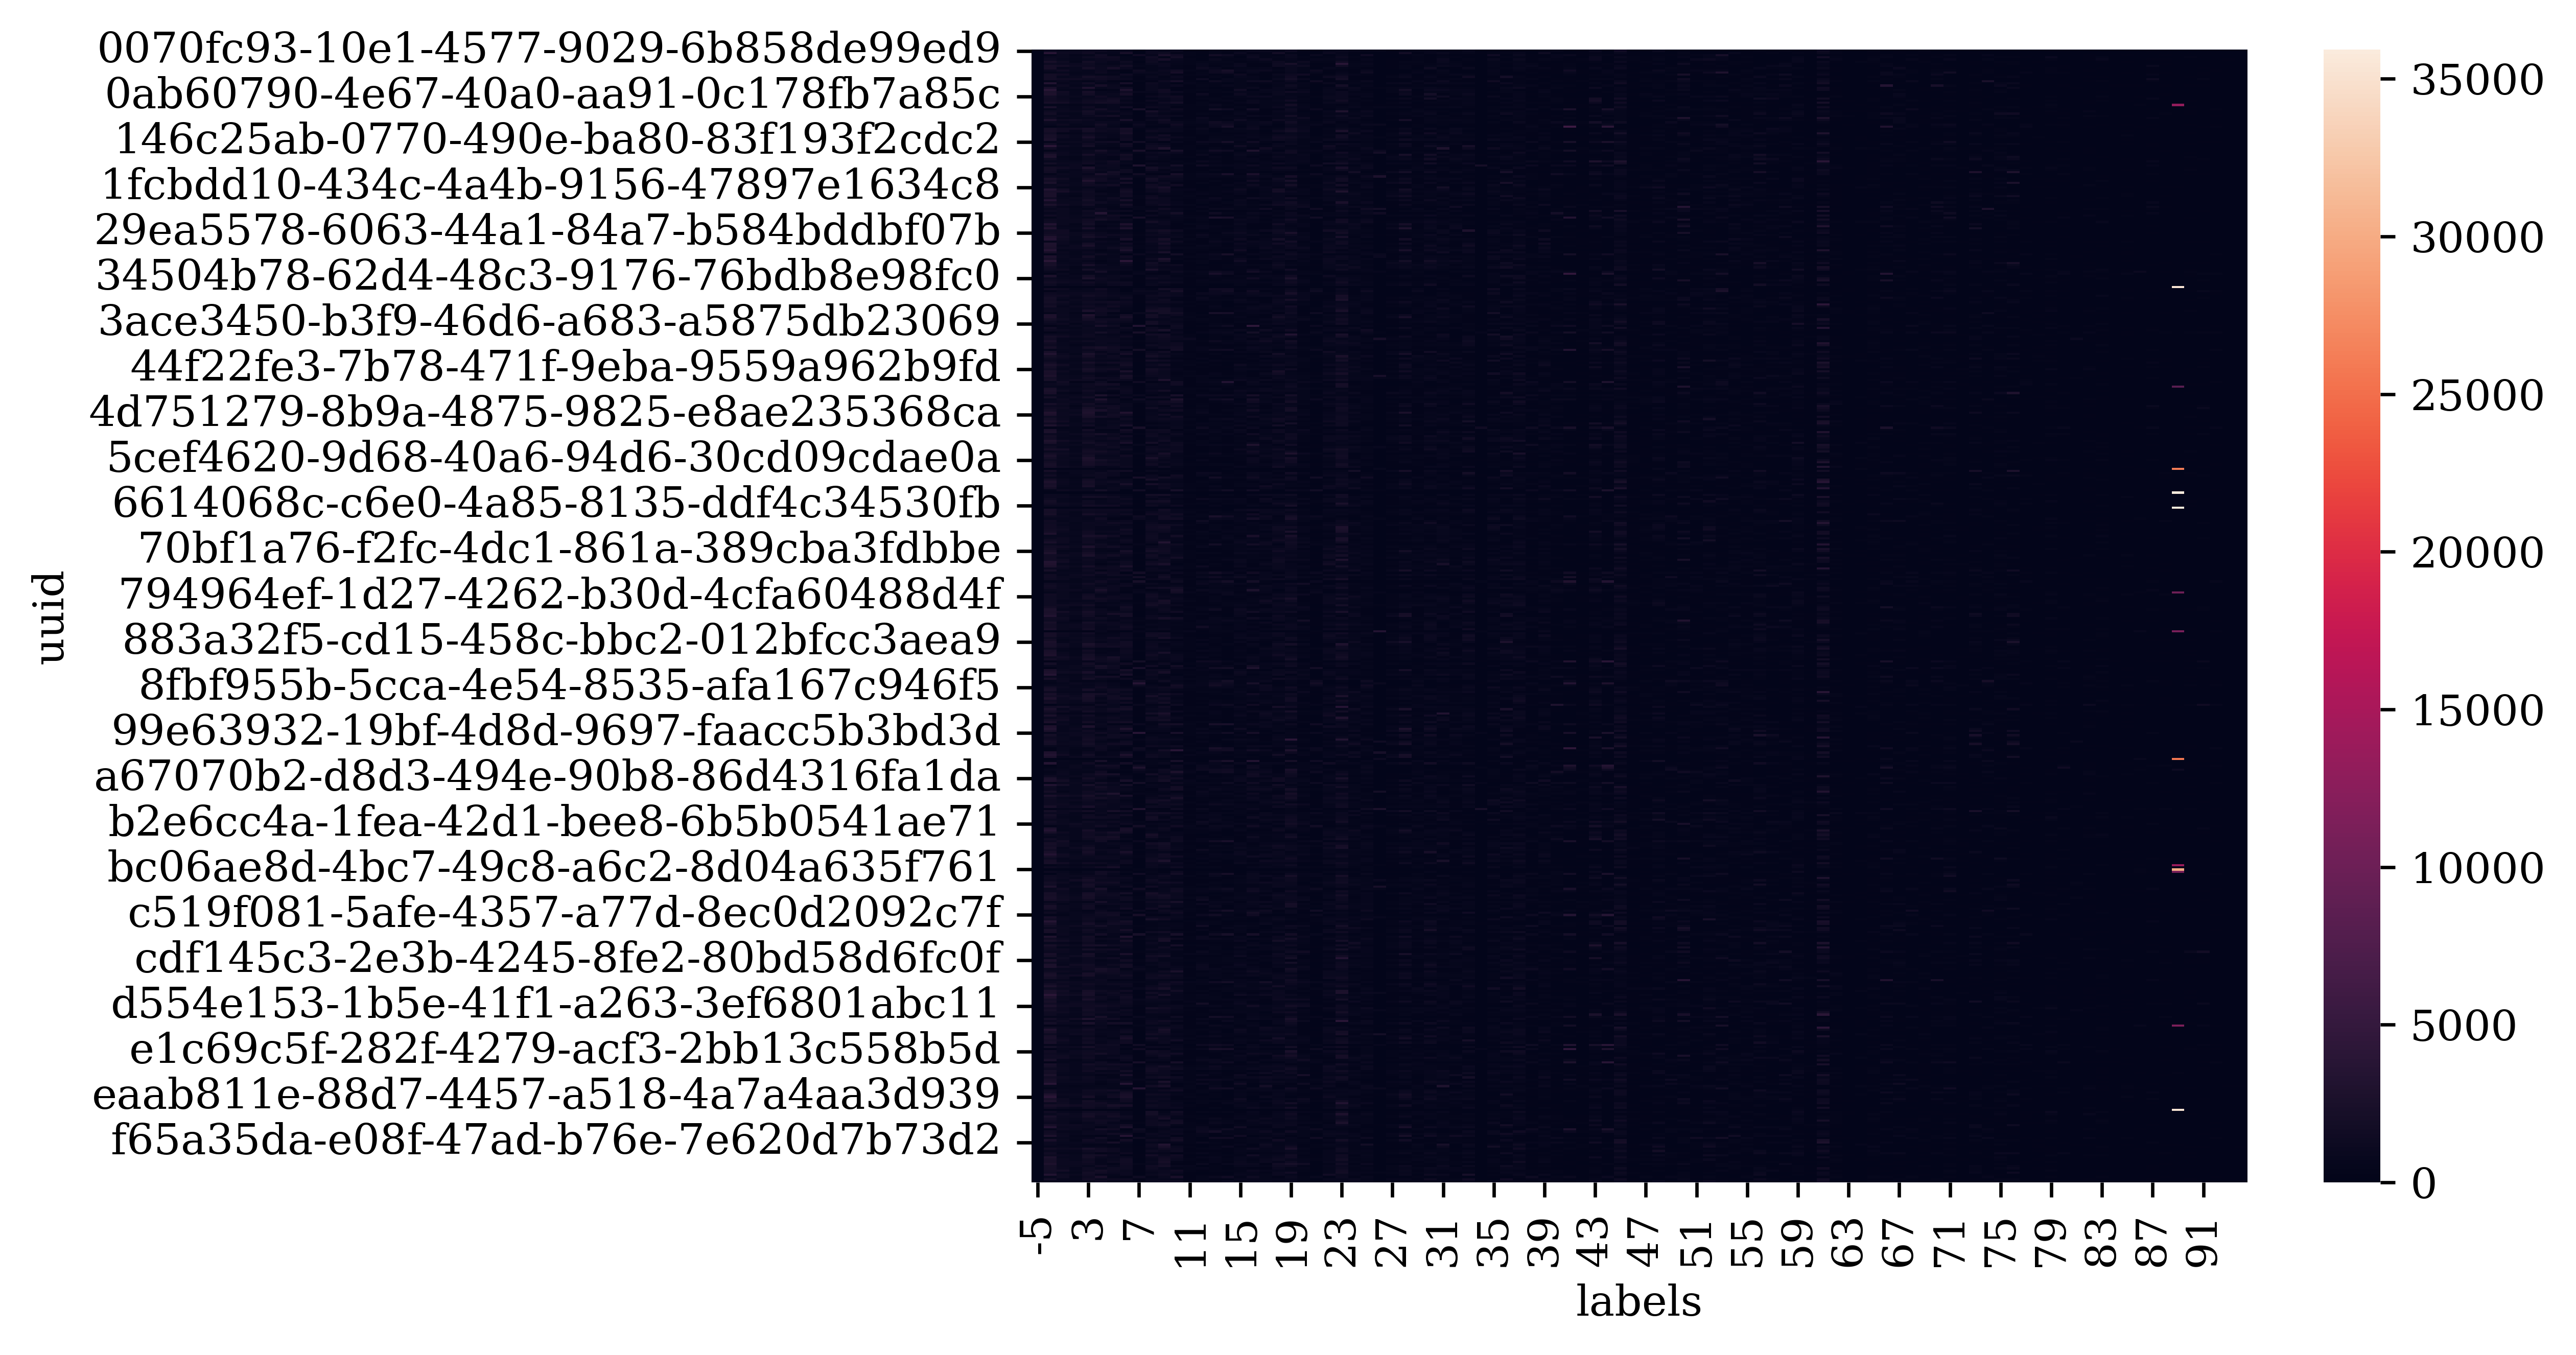

In [27]:
sns.heatmap(usage)